# Convolutions

In this lab, we'll look in detail at convolutions and how they can be used to process images.

### Reading and opening images

We'll use the `skimage` library to read and process images. It's a library dedicated to image processing, which is part of the `scikit-learn` family.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import skimage

sample image shape:  (400, 600, 3)


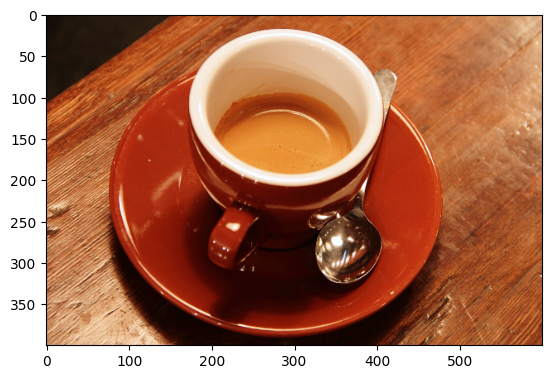

In [2]:
sample_image = skimage.data.coffee()

size = sample_image.shape
print("sample image shape: ", sample_image.shape)

plt.imshow(sample_image.astype('uint8'));

### A simple convolution filter

Before we start working on training any models, let's look at applying a convolution filter to an image. We'll use the `Conv2D` layer from Keras to do this.

In [3]:
from tensorflow.keras.layers import Conv2D

In [4]:
conv = Conv2D(filters=3, kernel_size=(5, 5), padding="same")

Remember: in Keras, `None` is used as a marker for tensor dimensions with dynamic size. In this case `batch_size`, `width` and `height` are all dynamic: they can depend on the input. This is a neat feature of convolutional neural networks: the same model can be used to process images of any size, because all we have to do is slide the convolutional filter across the image as much as necessary.

In [5]:
sample_image.shape

(400, 600, 3)

In [6]:
img_in = np.expand_dims(sample_image, 0).astype(float)
img_in.shape

(1, 400, 600, 3)

In [7]:
img_out = conv(img_in) # Apply the convolutional filter

The output is a tensorflow Eager Tensor - a special data structure that is used to represent the result of operations in TensorFlow. It is not a numpy array, but it can be converted to one using the `.numpy()` method:

In [8]:
np_img_out = img_out[0].numpy()
print(type(np_img_out))
print(np_img_out.shape)

<class 'numpy.ndarray'>
(400, 600, 3)


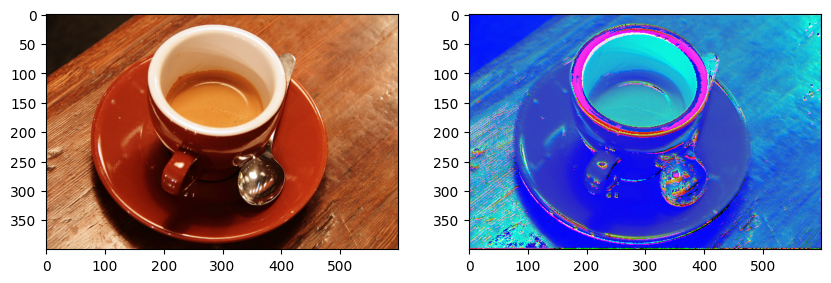

In [9]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(sample_image.astype('uint8'))
ax1.imshow(np_img_out.astype('uint8'));

As we can see, our convolutional filter was initialized randomly, so our output doesn't contain any specific meaning. Each pixel is a random combination of the pixels in the input image, in a 5x5 window.

Let's instead take a look at a convolutional feature with a clear purpose. We can build a kernel ourselves, by defining a function which will be passed to `Conv2D` Layer.
We'll create an array with 1/25 for filters, with each channel seperated. Before you move to the next cell, can you guess what this filter will do?

In [10]:
def my_kernel(shape=(5, 5, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype="float32")
    array[:, :, 0, 0] = 1 / 25
    array[:, :, 1, 1] = 1 / 25
    array[:, :, 2, 2] = 1 / 25
    return array

Now we can use this function to initialize a `Conv2D` layer:

In [11]:
conv = Conv2D(filters=3, kernel_size=(5, 5), padding="same", kernel_initializer=my_kernel)

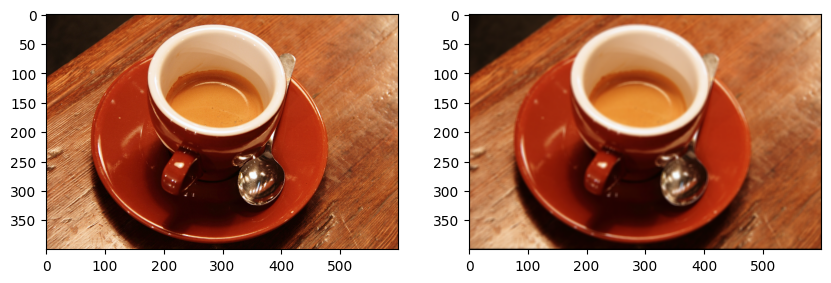

In [12]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))

img_out = conv(img_in)
np_img_out = img_out[0].numpy()
ax1.imshow(np_img_out.astype('uint8'));

Hopefully you can tell what this filter does!

**Exercise**
- There are a number of settings when we define our Conv2D layer. Try changing the following parameters to get a sense of how they impact the result:
- kernel_size: try different sizes
- padding: try 'valid' instead of 'same' (hint: this may change the size of the output)

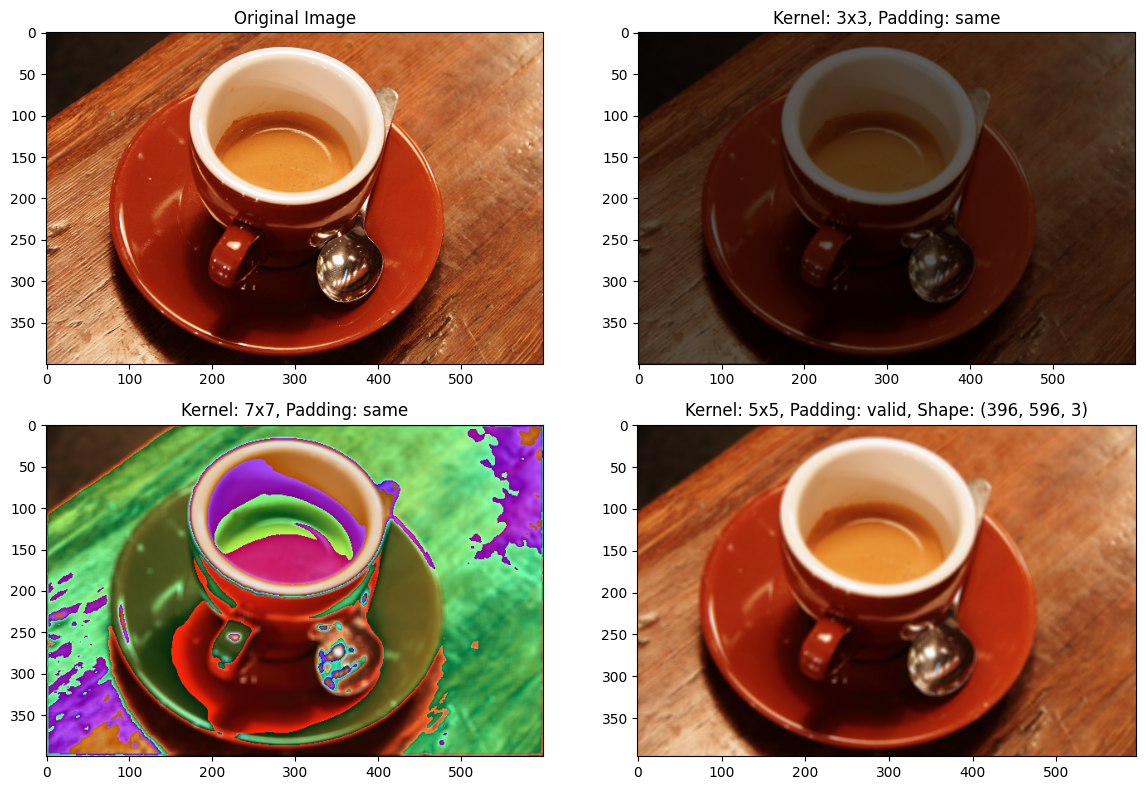

Original image shape: (1, 400, 600, 3)
Output with 'same' padding: (1, 400, 600, 3)
Output with 'valid' padding: (1, 396, 596, 3)


In [13]:
# Your Code Here
# Experiment with different kernel sizes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Original image
axes[0, 0].imshow(img_in[0].astype('uint8'))
axes[0, 0].set_title('Original Image')

# Kernel size 3x3 with 'same' padding
conv_3x3_same = Conv2D(filters=3, kernel_size=(3, 3), padding="same", kernel_initializer=my_kernel)
img_out_3x3_same = conv_3x3_same(img_in)
np_img_out_3x3_same = img_out_3x3_same[0].numpy()
axes[0, 1].imshow(np_img_out_3x3_same.astype('uint8'))
axes[0, 1].set_title('Kernel: 3x3, Padding: same')

# Kernel size 7x7 with 'same' padding
conv_7x7_same = Conv2D(filters=3, kernel_size=(7, 7), padding="same", kernel_initializer=my_kernel)
img_out_7x7_same = conv_7x7_same(img_in)
np_img_out_7x7_same = img_out_7x7_same[0].numpy()
axes[1, 0].imshow(np_img_out_7x7_same.astype('uint8'))
axes[1, 0].set_title('Kernel: 7x7, Padding: same')

# Kernel size 5x5 with 'valid' padding
conv_5x5_valid = Conv2D(filters=3, kernel_size=(5, 5), padding="valid", kernel_initializer=my_kernel)
img_out_5x5_valid = conv_5x5_valid(img_in)
np_img_out_5x5_valid = img_out_5x5_valid[0].numpy()
axes[1, 1].imshow(np_img_out_5x5_valid.astype('uint8'))
axes[1, 1].set_title(f'Kernel: 5x5, Padding: valid, Shape: {np_img_out_5x5_valid.shape}')

plt.tight_layout()
plt.show()

# Print shape differences to understand padding impact
print("Original image shape:", img_in.shape)
print("Output with 'same' padding:", img_out_7x7_same.shape)
print("Output with 'valid' padding:", img_out_5x5_valid.shape)

### Working on edge detection on Grayscale image

Using a grayscale image, let's build an "edge detector" using a convolutional filter. Some filters pre-date the deep learning era and are still used today. For example, the Sobel filter is used to detect edges in images. These easy-to-compute filters were used in the early days of computer vision and are still useful now.

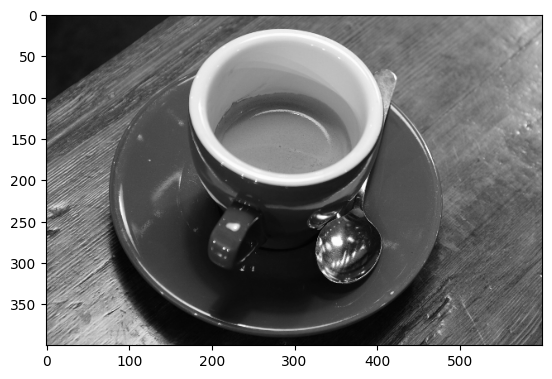

In [14]:
# convert image to greyscale
grey_sample_image = sample_image.mean(axis=2)

# add the channel dimension even if it's only one channel so
# to be consistent with Keras expectations.
grey_sample_image = grey_sample_image[:, :, np.newaxis]

# matplotlib does not like the extra dim for the color channel
# when plotting gray-level images. Let's use squeeze:
plt.imshow(np.squeeze(grey_sample_image.astype(np.uint8)),
           cmap=plt.cm.gray);

**Exercise**
- Build an edge detector using `Conv2D` on greyscale image by defining the kernel inside `my_kernel`.
- You may experiment with several kernels to find a way to detect edges. The following article contains specific examples of kernels that you can use:
- https://en.wikipedia.org/wiki/Kernel_(image_processing)
- Try different kernels and see the impact on the output.

Text(0.5, 1.0, 'Edge Detection (Sobel - Horizontal)')

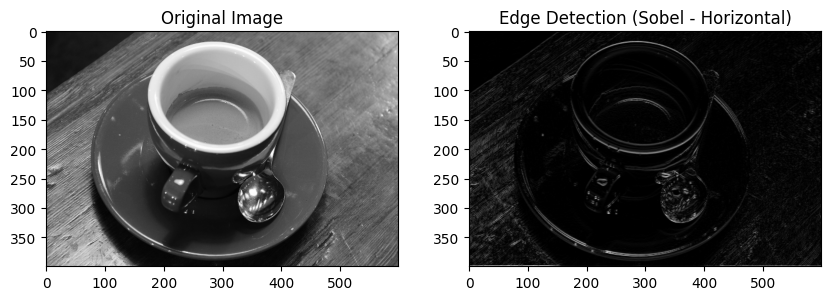

In [16]:
def my_kernel(shape=(3, 3, 1, 1), dtype=None):
    # Sobel edge detector (horizontal edges)
    array = np.array([
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ], dtype='float32')
    array = array.reshape(*shape)
    return array

# Alternative edge detection kernels to try:
# Vertical Sobel:
# array = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype='float32')
# Laplacian:
# array = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype='float32')

conv = Conv2D(filters=1, kernel_size=(3, 3), padding="same", kernel_initializer=my_kernel)

img_in = np.expand_dims(grey_sample_image, 0) # Reshape into a batch of size 1
img_out = conv(img_in) # Apply the convolutional filter
np_img_out = img_out[0].numpy() # Convert to numpy array

# Normalize the output for better visualization
np_img_out = np.abs(np_img_out)
np_img_out = np_img_out / np.max(np_img_out) * 255

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(np.squeeze(grey_sample_image.astype(np.uint8)),
           cmap=plt.cm.gray)
ax0.set_title('Original Image')
ax1.imshow(np.squeeze(np_img_out.astype(np.uint8)), cmap=plt.cm.gray)
ax1.set_title('Edge Detection (Sobel - Horizontal)')


### Pooling and strides with convolutions

**Exercise**
- Use `MaxPool2D` to apply a 2x2 max pool with strides 2 to the image. What is the impact on the shape of the image?
- Use `AvgPool2D` to apply an average pooling.
- Is it possible to compute a max pooling and an average pooling with well chosen kernels?

Original shape: (400, 600, 1)
MaxPool2D shape: (200, 300, 1)
AvgPool2D shape: (200, 300, 1)
Conv2D as AvgPool shape: (200, 300, 1)


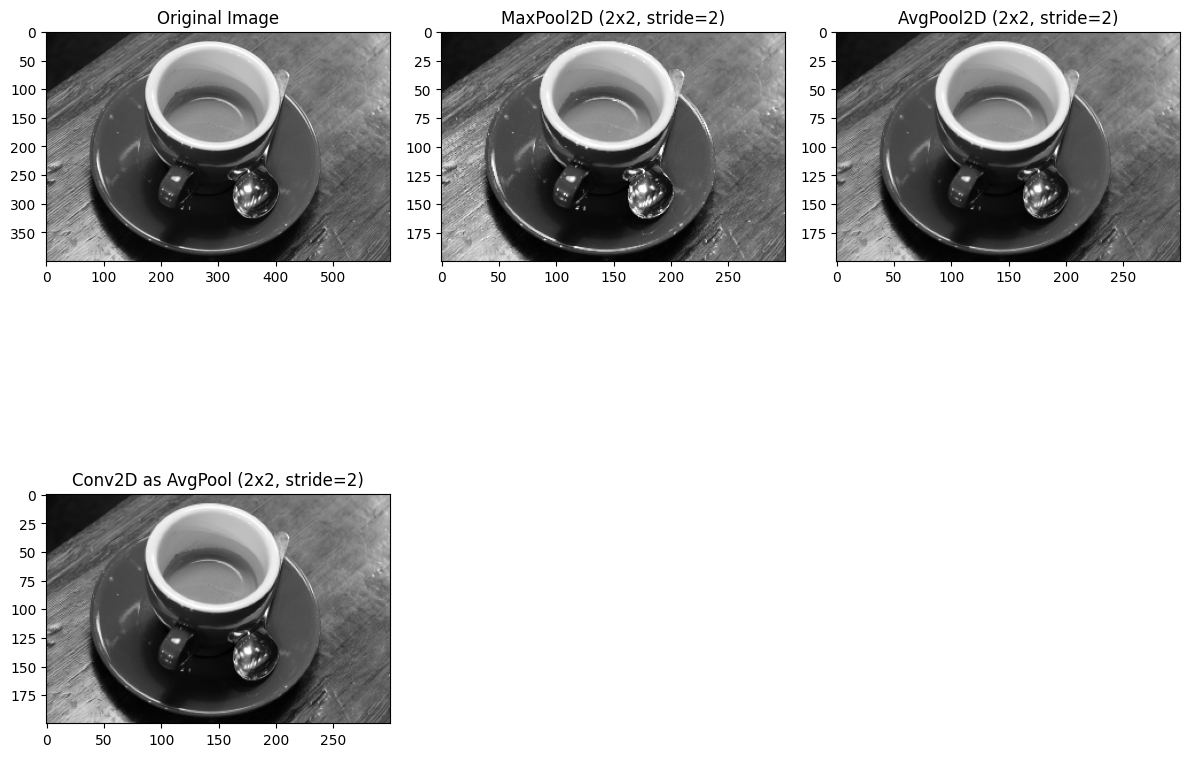


Answer to questions:
1. Impact on shape: Both MaxPool2D and AvgPool2D with stride=2 reduce the height and width by half
2. MaxPool vs AvgPool: MaxPool preserves edges and high-intensity features, while AvgPool blurs the image
3. Can pooling be implemented with convolutions?
   - AvgPool: Yes, with a kernel of all 1/n values (where n is kernel size squared)
   - MaxPool: Not directly with standard convolutions, would need non-linear operations


In [17]:
from tensorflow.keras.layers import MaxPool2D, AvgPool2D, Conv2D

# Original grayscale image
plt.figure(figsize=(12, 10))
plt.subplot(2, 3, 1)
plt.imshow(np.squeeze(grey_sample_image.astype(np.uint8)),
           cmap=plt.cm.gray)
plt.title('Original Image')
print("Original shape:", grey_sample_image.shape)

# MaxPool2D with 2x2 pool size and stride 2
max_pool = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="valid")
max_pool_out = max_pool(img_in)
max_pool_np = max_pool_out[0].numpy()
plt.subplot(2, 3, 2)
plt.imshow(np.squeeze(max_pool_np.astype(np.uint8)),
           cmap=plt.cm.gray)
plt.title('MaxPool2D (2x2, stride=2)')
print("MaxPool2D shape:", max_pool_np.shape)

# AvgPool2D with 2x2 pool size and stride 2
avg_pool = AvgPool2D(pool_size=(2, 2), strides=(2, 2), padding="valid")
avg_pool_out = avg_pool(img_in)
avg_pool_np = avg_pool_out[0].numpy()
plt.subplot(2, 3, 3)
plt.imshow(np.squeeze(avg_pool_np.astype(np.uint8)),
           cmap=plt.cm.gray)
plt.title('AvgPool2D (2x2, stride=2)')
print("AvgPool2D shape:", avg_pool_np.shape)

# Implementing MaxPool using Conv2D
# Create a kernel that picks the maximum value
def max_pool_kernel(shape=(2, 2, 1, 1), dtype=None):
    # This is not a real max pooling implementation with Conv2D
    # Just showing the concept - we'd need dilated convolutions and comparison ops
    array = np.zeros(shape, dtype='float32')
    return array  # This won't actually perform max pooling

# Implementing AvgPool using Conv2D - this actually works!
def avg_pool_kernel(shape=(2, 2, 1, 1), dtype=None):
    array = np.ones(shape, dtype='float32') / (shape[0] * shape[1])
    return array

# Apply average pooling using Conv2D with stride 2
conv_avg_pool = Conv2D(filters=1, kernel_size=(2, 2), strides=(2, 2), 
                        padding="valid", kernel_initializer=avg_pool_kernel)
conv_avg_out = conv_avg_pool(img_in)
conv_avg_np = conv_avg_out[0].numpy()

plt.subplot(2, 3, 4)
plt.imshow(np.squeeze(conv_avg_np.astype(np.uint8)),
           cmap=plt.cm.gray)
plt.title('Conv2D as AvgPool (2x2, stride=2)')
print("Conv2D as AvgPool shape:", conv_avg_np.shape)

plt.tight_layout()
plt.show()

print("\nAnswer to questions:")
print("1. Impact on shape: Both MaxPool2D and AvgPool2D with stride=2 reduce the height and width by half")
print("2. MaxPool vs AvgPool: MaxPool preserves edges and high-intensity features, while AvgPool blurs the image")
print("3. Can pooling be implemented with convolutions?")
print("   - AvgPool: Yes, with a kernel of all 1/n values (where n is kernel size squared)")
print("   - MaxPool: Not directly with standard convolutions, would need non-linear operations")

## Loading a JPEG file as a numpy array

Let's use [scikit-image](http://scikit-image.rg) to load the content of a JPEG file into a numpy array:

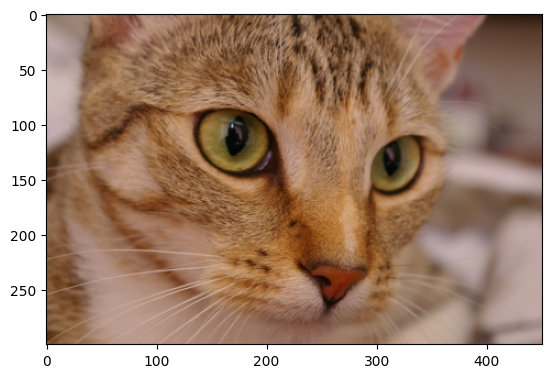

In [18]:
from skimage.io import imread

image = skimage.data.cat()
plt.imshow(image);

## Resizing images, handling data types and dynamic ranges

While convolutions can handle inputs of any size, it is often useful to resize images to a fixed size. This is particularly important for training deep learning models:

- for **image classification**, most networks expect a specific **fixed input size**;

- for **object detection** and instance segmentation, networks have more flexibility but the image should have **approximately the same size as the training set images**.

Furthermore **large images can be much slower to process** than smaller images (the number of pixels varies quadratically with the height and width).

In [19]:
from skimage.transform import resize

lowres_image = resize(image, (50, 50), mode='reflect', anti_aliasing=True)
lowres_image.shape

(50, 50, 3)

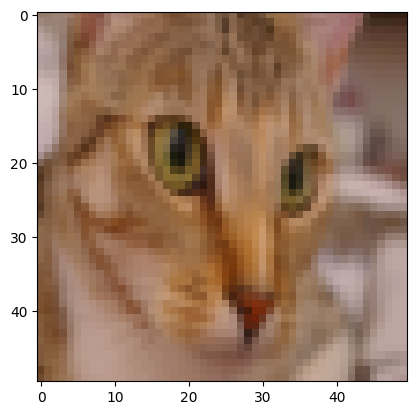

In [20]:
plt.imshow(lowres_image, interpolation='nearest');

The values of the pixels of the low resolution image are computed from by combining the values of the pixels in the high resolution image. The result is therefore represented as floating points.

## Using a pretrained model

Objectives:

- Load a pre-trained ResNet50 pre-trained model using Keras Zoo
- Use the model to classify an image
- Use the model to classify an image from the webcam

Let's start with loading ResNet50, a well-established method for image classification. The ResNet50 "application" takes two key parameters here: firstly, `include_top` indicates whether we want to include the last layer of the network (the classification layer) or not. Secondly, `weights` indicates whether we want to load the weights of a model that has been pre-trained on ImageNet or not.

In [21]:
from tensorflow.keras.applications.resnet50 import ResNet50

model = ResNet50(include_top=True, weights='imagenet')
model.compile(optimizer='sgd', loss='categorical_crossentropy')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [22]:
print(model.summary())

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

None


### Classification of an image

**Exercise**
- Reshape the `cat` image to the shape `(224, 224, 3)` using `resize` from `skimage.transform`
- Use `preprocess_input` from `tensorflow.keras.applications.imagenet_utils` to preprocess the image
- Use `predict` to classify the image

Documentation for each method:
- [resize](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize)
- [preprocess_input](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet/preprocess_input)
- [predict](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict)

Original image shape: (300, 451, 3)
Resized image shape: (224, 224, 3)


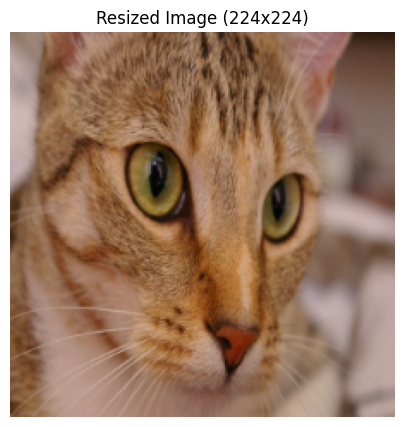

Preprocessed image shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Top 5 predictions:
1: Egyptian_cat (0.955)
2: tiger_cat (0.018)
3: tabby (0.018)
4: shower_cap (0.006)
5: plastic_bag (0.001)
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Top 5 predictions:
1: Egyptian_cat (0.955)
2: tiger_cat (0.018)
3: tabby (0.018)
4: shower_cap (0.006)
5: plastic_bag (0.001)


In [23]:
from keras.applications.resnet50 import preprocess_input, decode_predictions
from skimage.transform import resize
import numpy as np

# 1. Reshape the cat image to the shape (224, 224, 3)
resized_image = resize(image, (224, 224), preserve_range=True).astype('uint8')
print("Original image shape:", image.shape)
print("Resized image shape:", resized_image.shape)

# Display the resized image
plt.figure(figsize=(5, 5))
plt.imshow(resized_image)
plt.title('Resized Image (224x224)')
plt.axis('off')
plt.show()

# 2. Preprocess the image for the ResNet50 model
# First, expand dimensions to create a batch of size 1
img_batch = np.expand_dims(resized_image, 0)
# Apply preprocessing required by ResNet50
preprocessed_img = preprocess_input(img_batch)
print("Preprocessed image shape:", preprocessed_img.shape)

# 3. Use predict to classify the image
predictions = model.predict(preprocessed_img)

# Decode and display the top 5 predictions
decoded_predictions = decode_predictions(predictions, top=5)[0]
print("\nTop 5 predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}: {label} ({score:.3f})")



##  Taking snapshots from the webcam

For this section, we will take an image from your laptop webcam and classify it. If you feel uncomfortable doing this section, you can skip it and use a photo of your choice from the web instead.

In [30]:
!pip install opencv-python

     |████████████████████████████████| 37.9 MB 8.2 MB/s eta 0:00:01    |██▎                             | 2.7 MB 8.2 MB/s eta 0:00:05     |██████████████████▏             | 21.6 MB 8.2 MB/s eta 0:00:02
You should consider upgrading via the '/Users/soumyadey/.pyenv/versions/3.10.0/bin/python3.10 -m pip install --upgrade pip' command.


In [31]:
import cv2

def camera_grab(camera_id=0, fallback_filename=None):
    camera = cv2.VideoCapture(camera_id)
    try:
        # take 10 consecutive snapshots to let the camera automatically tune
        # itself and hope that the contrast and lighting of the last snapshot
        # is good enough.
        for i in range(10):
            snapshot_ok, image = camera.read()
        if snapshot_ok:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        else:
            print("WARNING: could not access camera")
            if fallback_filename:
                image = imread(fallback_filename)
    finally:
        camera.release()
    return image

dtype: uint8, shape: (600, 600, 3), range: (np.uint8(0), np.uint8(255))


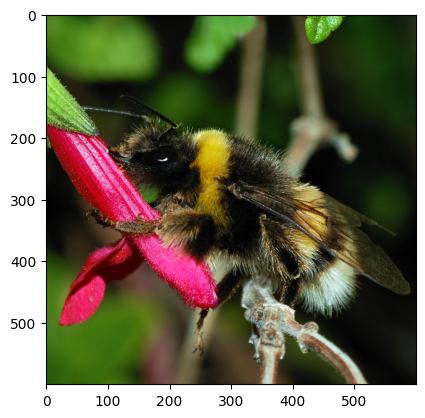

In [38]:
from skimage.io import imread

image = imread("images/bumblebee.png")
plt.imshow(image)
print("dtype: {}, shape: {}, range: {}".format(
  image.dtype, image.shape, (image.min(), image.max())))


### Exercise

Apply the same preprocessing as before and classify the image. What are your results?

Original webcam image shape: (600, 600, 3)
Resized webcam image shape: (224, 224, 3)


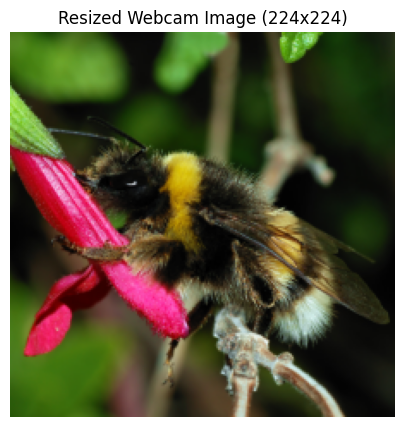

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step

Top 5 predictions for webcam image:
1: bee (0.973)
2: lacewing (0.006)
3: fly (0.006)
4: dragonfly (0.004)
5: sulphur_butterfly (0.001)

Top 5 predictions for webcam image:
1: bee (0.973)
2: lacewing (0.006)
3: fly (0.006)
4: dragonfly (0.004)
5: sulphur_butterfly (0.001)


In [39]:
from skimage.transform import resize

# 1. Reshape the webcam image to the shape (224, 224, 3)
resized_webcam_image = resize(image, (224, 224), preserve_range=True).astype('uint8')
print("Original webcam image shape:", image.shape)
print("Resized webcam image shape:", resized_webcam_image.shape)

# Display the resized image
plt.figure(figsize=(5, 5))
plt.imshow(resized_webcam_image)
plt.title('Resized Webcam Image (224x224)')
plt.axis('off')
plt.show()

# 2. Preprocess the image for the ResNet50 model
# First, expand dimensions to create a batch of size 1
img_batch = np.expand_dims(resized_webcam_image, 0)
# Apply preprocessing required by ResNet50
preprocessed_img = preprocess_input(img_batch)

# 3. Use predict to classify the image
predictions = model.predict(preprocessed_img)

# Decode and display the top 5 predictions
decoded_predictions = decode_predictions(predictions, top=5)[0]
print("\nTop 5 predictions for webcam image:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}: {label} ({score:.3f})")

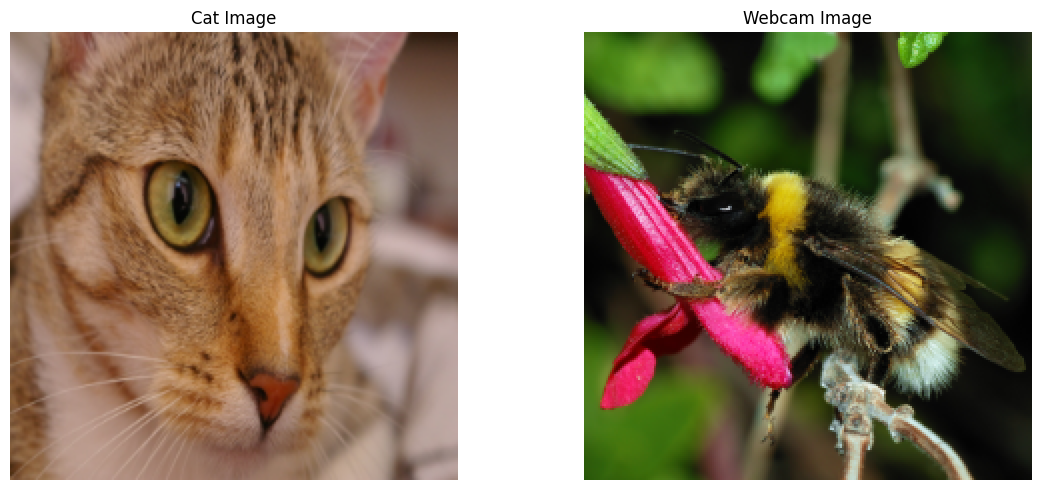

Observations:
1. Both images were resized to 224x224x3, which is what ResNet50 requires
2. Both went through the same preprocessing steps using preprocess_input
3. The model uses the same weights to classify both images
4. The results show how pre-trained models can classify various objects in real-time
5. This demonstrates transfer learning - using knowledge from ImageNet to classify new images


In [40]:
# Compare the results between the cat image and webcam image
plt.figure(figsize=(12, 5))

# Display both images side by side
plt.subplot(1, 2, 1)
plt.imshow(resized_image)
plt.title('Cat Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_webcam_image)
plt.title('Webcam Image')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Observations:")
print("1. Both images were resized to 224x224x3, which is what ResNet50 requires")
print("2. Both went through the same preprocessing steps using preprocess_input")
print("3. The model uses the same weights to classify both images")
print("4. The results show how pre-trained models can classify various objects in real-time")
print("5. This demonstrates transfer learning - using knowledge from ImageNet to classify new images")